In [9]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/nifty_sensex_close_data/data/Sensex_2011_to_2023(separated).csv')

In [5]:
df = data[['Date','M&M.NS(close)']]
df = df.rename(columns={'M&M.NS(close)':'Close'})
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#parameters
n = 5
m = 50
t = 100

In [10]:
df.loc[:,'EMAa'] = df['Close'].ewm(span=n, adjust=False).mean()

df.loc[:,'EMAb'] = df['Close'].ewm(span=m, adjust=False).mean()

df.loc[:,'EMAc'] = df['Close'].ewm(span=t, adjust=False).mean()

In [11]:
for i in range(n):
    df.loc[i,'EMAa'] = None
for i in range(m):
    df.loc[i,'EMAb'] = None
for i in range(t):
    df.loc[i,'EMAc'] = None

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df)

           Date        Close         EMAa         EMAb         EMAc
0    2011-01-03   354.620422         None         None         None
1    2011-01-04   351.783600         None         None         None
2    2011-01-05   347.190735         None         None         None
3    2011-01-06   347.280792         None         None         None
4    2011-01-07   333.344513         None         None         None
5    2011-01-10   328.053772   339.028957         None         None
6    2011-01-11   330.935547   336.331153         None         None
7    2011-01-12   338.275146   336.979151         None         None
8    2011-01-13   332.173859   335.377387         None         None
9    2011-01-14   333.006866   334.587213         None         None
10   2011-01-17   332.151337   333.775255         None         None
11   2011-01-18   336.091278   334.547262         None         None
12   2011-01-19   338.095032   335.729852         None         None
13   2011-01-20   342.350189   337.936631       

In [16]:
trade_sig=np.zeros([len(df),1],dtype=float)

for i in range(t+1,len(df.index)):
    if df.loc[i-1,'EMAa'] > df.loc[i-1,'EMAb'] and df.loc[i-1,'EMAa'] > df.loc[i-1,'EMAc']:
        trade_sig[i] = 1
    if df.loc[i-1,'EMAa'] < df.loc[i-1,'EMAb'] and df.loc[i-1,'EMAa'] < df.loc[i-1,'EMAc']:
        trade_sig[i] = -1

trade_sig=trade_sig.reshape(len(trade_sig),1)
trade_sig.shape

(3204, 1)

In [20]:
df_numpy = df.to_numpy()

final=np.column_stack((df_numpy,trade_sig))
final_df=pd.DataFrame(final,columns=['Date','Close','EMAa','EMAb','EMAc','Trade_Signal'])
final_df.drop(['EMAa','EMAb','EMAc'],axis=1,inplace=True)

final_df['Trade_Signal'] = final_df['Trade_Signal'].astype(float)
final_df['Close']=final_df['Close'].astype(float)

In [22]:
final_df.dtypes


Date            datetime64[ns]
Close                  float64
Trade_Signal           float64
dtype: object

In [23]:
final_df.to_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/nifty_sensex_close_data/data/trading_signal_tema_mm.csv',index=False)

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(trades)

     index        Date Order Type        Price
0        1  2011-06-01       Sell   304.323761
1        2  2011-06-02       Sell   297.862244
2        3  2011-06-03       Sell   301.261871
3        4  2011-06-06       Sell   296.106171
4        5  2011-06-07       Sell   299.100494
5        6  2011-06-08       Sell   299.122986
6        7  2011-06-09       Sell   299.640869
7        8  2011-06-10       Sell   298.177429
8        9  2011-06-13       Sell   299.077942
9       10  2011-06-14       Sell   302.432648
10      11  2011-06-15       Sell   299.370636
11      12  2011-06-16       Sell   295.880951
12      13  2011-06-17       Sell   290.027344
13      14  2011-06-20       Sell   285.141724
14      15  2011-06-21       Sell   285.682068
15      16  2011-06-22       Sell   292.098663
16      17  2011-06-23       Sell   294.237488
17      18  2011-06-24       Sell   303.400696
18      19  2011-06-27       Sell   312.181244
19      20  2011-06-28       Sell   312.609009
20      21  2

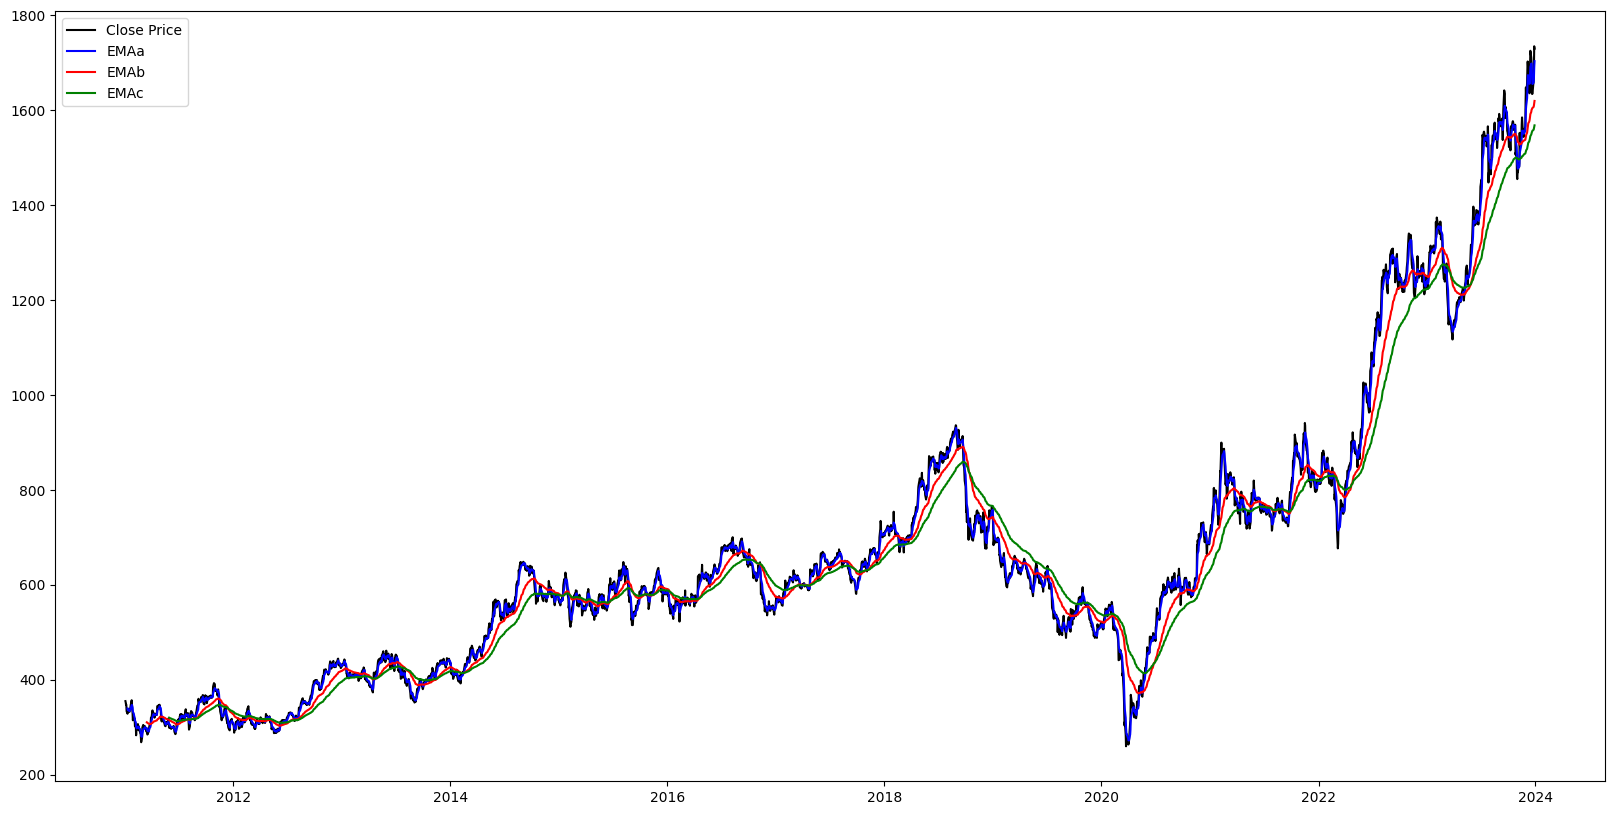

In [24]:
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['Close'],label='Close Price',color='black')
plt.plot(df['Date'],df['EMAa'],label='EMAa',color='blue')
plt.plot(df['Date'],df['EMAb'],label='EMAb',color='red')
plt.plot(df['Date'],df['EMAc'],label='EMAc',color='green')
plt.legend()
plt.show()